In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)

In [64]:
def calMean(df, col):
    std = df[col].std()
    mean = df[col].mean()
    left = mean - 1.5 * std
    right = mean + 1.5 * std
    realMean = df[(df[col] > left) & (df[col] < right)][col].mean()
    return realMean

In [3]:
orig_col_headers = ['credit_score', 'first_payment_date', 'first_time_homebuyer_flag', 'maturity_date', 'metropolitan_stat_area', 'mortgage_insurance_perc', 'no_unit', 'occupancy_status', 'orig_combined_loantovalue', 'orig_debttoincome', 'orig_upb', 'orig_loantovalue', 'orig_interest_rate', 'channel', 'prepayment_penalty_mortgage_flag', 'product_type', 'property_state', 'property_type', 'postal_code', 'loan_sequence_no', 'loan_purpose', 'orig_loan_term', 'no_borrower', 'seller_name', 'service_name', 'super_conforming_flag']

In [4]:
perform_col_headers = ['loan_sequence_no', 'monthly_reporting_period', 'curr_actual_upb', 'curr_loan_delinquency_status', 'loan_age', 'remaining_months_to_legal_maturity', 'repurchase_flag', 'modification_flag', 'zero_balance_code', 'zero_balance_effective_date', 'curr_interest_rate', 'curr_deferred_upb', 'due_date_last_paid_installment', 'mi_recoveries', 'net_sales_proceeds', 'non_mi_recoveries', 'expenses', 'legal_costs', 'maintain_preserve_costs', 'tax_insurance', 'miscellaneous_expense', 'actual_loss_calculation', 'modification_cost']

In [168]:
orig_df = pd.read_csv('historical_data1_Q22007/historical_data1_Q22007.txt', sep='|', names=orig_col_headers)

In [152]:
orig_df = pd.read_csv('sample_2005/sample_orig_2005.txt', sep='|', names=orig_col_headers)

In [169]:
orig_df.head(20)

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_stat_area,mortgage_insurance_perc,no_unit,occupancy_status,orig_combined_loantovalue,orig_debttoincome,orig_upb,orig_loantovalue,orig_interest_rate,channel,prepayment_penalty_mortgage_flag,product_type,property_state,property_type,postal_code,loan_sequence_no,loan_purpose,orig_loan_term,no_borrower,seller_name,service_name,super_conforming_flag
0,784,200707,N,203706,NaN,0,1,O,80.0,20,104000,80.0,6.375,R,N,FRM,IL,SF,61300,F107Q2000001,P,360,1.0,Other sellers,Other servicers,NaN
1,787,200706,N,203705,48300.0,30,1,O,95.0,26,110000,95.0,6.000,R,N,FRM,WA,MH,98800,F107Q2000002,P,360,2.0,Other sellers,Other servicers,NaN
2,755,200706,N,203705,38860.0,0,1,O,33.0,29,60000,28.0,6.125,R,N,FRM,ME,SF,4000,F107Q2000003,C,360,1.0,Other sellers,Other servicers,NaN
3,710,200706,N,203705,19380.0,30,1,O,92.0,47,151000,92.0,6.250,R,N,FRM,OH,SF,45300,F107Q2000004,N,360,1.0,Other sellers,USBANKNA,NaN
4,800,200706,N,203705,31540.0,0,1,O,67.0,59,185000,67.0,6.000,R,N,FRM,WI,SF,53900,F107Q2000005,N,360,2.0,Other sellers,Other servicers,NaN
5,673,200706,N,203705,15804.0,0,1,O,78.0,22,410000,78.0,6.375,R,N,FRM,NJ,SF,8000,F107Q2000006,N,360,1.0,Other sellers,USBANKNA,NaN
6,787,200707,N,203706,16580.0,25,1,O,87.0,30,285000,87.0,6.375,R,N,FRM,IL,SF,61800,F107Q2000007,P,360,2.0,Other sellers,Other servicers,NaN
7,719,200708,N,203707,NaN,0,2,I,80.0,43,72000,80.0,7.000,R,N,FRM,OH,SF,43300,F107Q2000008,N,360,2.0,Other sellers,Other servicers,NaN
8,779,200708,Y,203707,16974.0,30,1,O,93.0,27,185000,93.0,6.750,R,N,FRM,IL,SF,60100,F107Q2000009,P,360,1.0,Other sellers,Other servicers,NaN
9,806,200706,N,203705,NaN,0,1,O,30.0,54,57000,30.0,6.375,R,N,FRM,IN,SF,47500,F107Q2000010,N,360,2.0,Other sellers,Other servicers,NaN


In [154]:
orig_df.dtypes

credit_score                         object
first_payment_date                    int64
first_time_homebuyer_flag            object
maturity_date                         int64
metropolitan_stat_area              float64
mortgage_insurance_perc              object
no_unit                               int64
occupancy_status                     object
orig_combined_loantovalue           float64
orig_debttoincome                    object
orig_upb                              int64
orig_loantovalue                    float64
orig_interest_rate                  float64
channel                              object
prepayment_penalty_mortgage_flag     object
product_type                         object
property_state                       object
property_type                        object
postal_code                         float64
loan_sequence_no                     object
loan_purpose                         object
orig_loan_term                        int64
no_borrower                     

Clean Credit Score column

In [ ]:
for index, row in orig_df.iterrows():
    try:
        int(row['credit_score'])
        
    except:
        print([index, row['credit_score']])

In [75]:
orig_df.loc[orig_df['credit_score'] == "   ", 'credit_score'] = 300     # Unknown

In [76]:
orig_df['credit_score'] = orig_df['credit_score'].astype(int)

Clean orig_debttoincome

In [37]:
for index, row in orig_df.iterrows():
    try:
        int(row['orig_debttoincome'])
    except:
        print([index, row['orig_debttoincome']])

In [11]:
from random import randint

In [156]:
for ind, row in orig_df.iterrows():
    if row['orig_debttoincome'] == "   ":
        orig_df.iloc[ind, orig_df.columns.get_loc('orig_debttoincome')] = randint(65, 70)

In [166]:
from numbers import Number

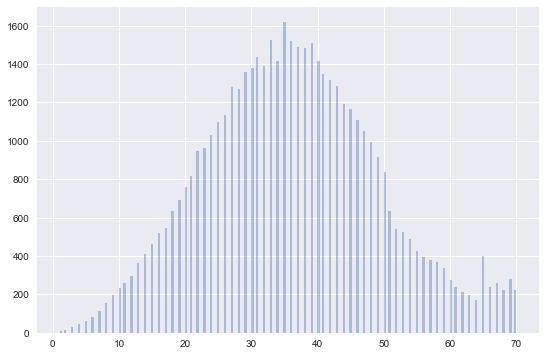

In [167]:
col = 'orig_debttoincome'
new_df = orig_df[orig_df[col].apply(lambda x: isinstance(x, Number))]
new_df[col] = new_df[col].astype(int)
sns.distplot(new_df[col].values, bins=200, kde=False)

In [34]:
import numpy as np

In [158]:
mean = calMean(new_df, 'orig_debttoincome')
orig_df['orig_debttoincome'] = orig_df['orig_debttoincome'].fillna(mean)

In [96]:
orig_df['orig_debttoincome'] = orig_df['orig_debttoincome'].astype(int)

Missing Value Analysis

In [97]:
missing_df = orig_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['col', 'missing_cnt']
missing_df = missing_df[missing_df['missing_cnt'] > 0]
missing_df

,col,missing_cnt
2,first_time_homebuyer_flag,6065
4,metropolitan_stat_area,7913
8,orig_combined_loantovalue,6
11,orig_loantovalue,6
14,prepayment_penalty_mortgage_flag,49
18,postal_code,1
22,no_borrower,17
25,super_conforming_flag,50000


Clean First time homebuyer flag

In [185]:
orig_df['first_time_homebuyer_flag'].describe()

count     361792
unique         2
top            N
freq      324262
Name: first_time_homebuyer_flag, dtype: object

In [186]:
orig_df['first_time_homebuyer_flag'] = orig_df['first_time_homebuyer_flag'].fillna('N')

Clean Metropolitan stat area

In [187]:
orig_df['metropolitan_stat_area'] = orig_df['metropolitan_stat_area'].fillna(0)

Clean no_unit

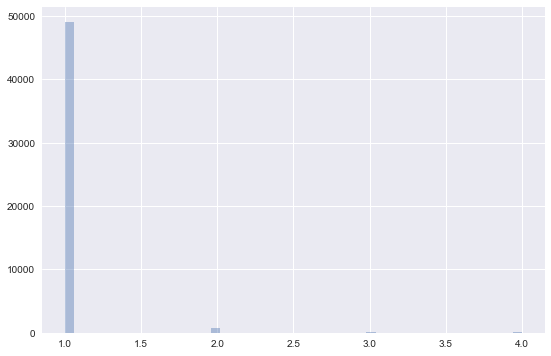

In [105]:
col = 'no_unit'
new_df = orig_df[orig_df[col] == orig_df[col]]
sns.distplot(new_df[col].values, kde=False)

In [102]:
orig_df['no_unit'].value_counts()

1    48980
2      808
3      122
4       90
Name: no_unit, dtype: int64

In [189]:
orig_df['no_unit'] = orig_df['no_unit'].fillna(1)

Clean orig_combined_loantovalue

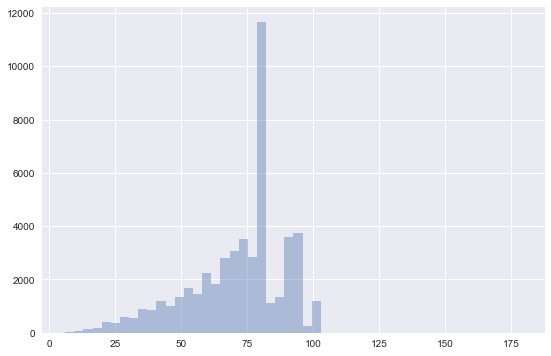

In [120]:
col = 'orig_combined_loantovalue'
new_df = orig_df[orig_df[col] == orig_df[col]]
sns.distplot(new_df[col].values, kde=False)

In [114]:
mode = orig_df['orig_combined_loantovalue'].mode()[0]
mode

80.0

In [124]:
new_df = orig_df[orig_df['orig_combined_loantovalue'] != 80]
mean = calMean(new_df, 'orig_combined_loantovalue')
mean

71.6857819094331

In [125]:
orig_df['orig_combined_loantovalue'] = orig_df['orig_combined_loantovalue'].fillna(mean)

Clean orig_loantovalue

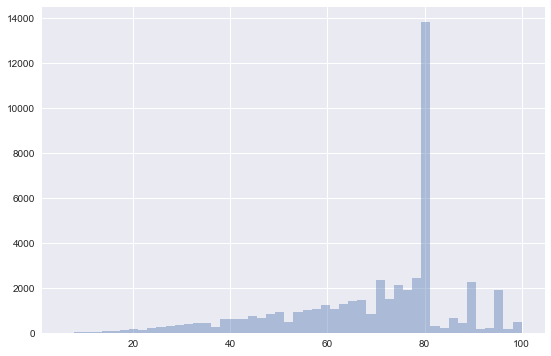

In [126]:
col = 'orig_loantovalue'
new_df = orig_df[orig_df[col] == orig_df[col]]
sns.distplot(new_df[col].values, kde=False)

In [127]:
mode = orig_df['orig_loantovalue'].mode()[0]
mode

80.0

In [128]:
new_df = orig_df[orig_df['orig_loantovalue'] != 80]
mean = calMean(new_df, 'orig_loantovalue')
mean

66.76448622621115

In [129]:
orig_df['orig_loantovalue'] = orig_df['orig_loantovalue'].fillna(mode)

Clean prepayment_penalty_mortgage_flag

In [194]:
orig_df['prepayment_penalty_mortgage_flag'].describe()

count     405283
unique         2
top            N
freq      404487
Name: prepayment_penalty_mortgage_flag, dtype: object

In [195]:
orig_df['prepayment_penalty_mortgage_flag'] = orig_df['prepayment_penalty_mortgage_flag'].fillna('N')

Clean Postal Code

In [196]:
orig_df['postal_code'] = orig_df['postal_code'].fillna('00000')

Clean no_borrower

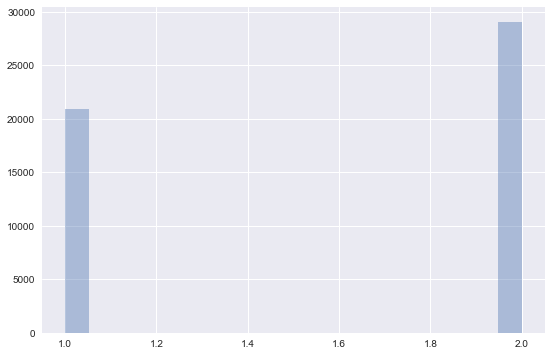

In [130]:
col = 'no_borrower'
new_df = orig_df[orig_df[col] == orig_df[col]]
sns.distplot(new_df[col].values, kde=False)

In [29]:
from random import random

In [24]:
orig_df['no_borrower'].value_counts().reset_index()

,index,no_borrower
0,2.0,29033
1,1.0,20950


In [30]:
one_borrower_perc = orig_df['no_borrower'].value_counts()[1.0] / orig_df.shape[0]
temp_df = orig_df[orig_df['no_borrower'] != orig_df['no_borrower']]
for ind, row in temp_df.iterrows():
    orig_df.iloc[ind, orig_df.columns.get_loc('no_borrower')] = 1 if random() < one_borrower_perc else 2

Clean mortgage_insurance_perc

C:\Users\liuji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


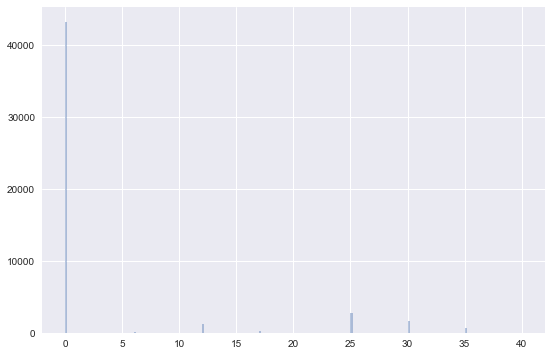

In [163]:
col = 'mortgage_insurance_perc'
new_df = orig_df[orig_df[col].apply(lambda x: x.isnumeric())]
new_df[col] = new_df[col].astype(int)
sns.distplot(new_df[col].values, bins=200, kde=False)

In [137]:
orig_df.loc[orig_df['mortgage_insurance_perc'] == "   ", 'mortgage_insurance_perc'] = 0
orig_df.loc[orig_df['mortgage_insurance_perc'] == "000", 'mortgage_insurance_perc'] = 0

In [139]:
orig_df['mortgage_insurance_perc'] = orig_df['mortgage_insurance_perc'].astype(int)

Drop super_confirming_flag

In [201]:
orig_df = orig_df.drop('super_conforming_flag', 1)

In [202]:
orig_df.to_csv('historical_data1_Q22005/historical_data1_Q22005_clean.csv', index=False)